In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import itertools


%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [131]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [132]:
df.Make.unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'], dtype=object)

The R^2 value is 0.02046344732348948
The equation for the line is y =  [[-0.1725205]]x + [ 24764.55900606]


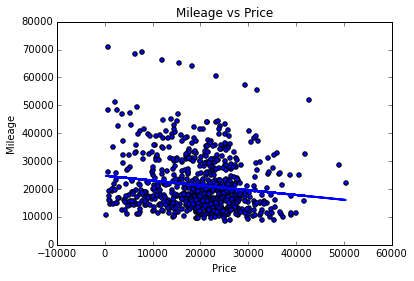

In [133]:
price = df[['Price']]
mileage = df[['Mileage']]
regr = linear_model.LinearRegression()
regr.fit(mileage, price)
predict = regr.predict(mileage)
plt.scatter(mileage, price)
plt.plot(mileage, predict,  c='red', linewidth=2)
plt.title("Mileage vs Price")
plt.xlabel("Price")
plt.ylabel("Mileage")
print("The R^2 value is {}".format(regr.score(mileage,price)))
print("The equation for the line is y =  {}x + {}".format(regr.coef_, regr.intercept_))

In [134]:
fn = lambda x: regr.predict(mileage)[0]
def plot_regression(fn):
    # scatter plot first
    plt.scatter(mileage, price)
    xmin, xmax = plt.xlim()
    xs = np.linspace(xmin, xmax, 80000)
    # fn is our (y = mx + b) expression
    plt.ylim(ymax=80000, ymin=0)
    plt.plot(xs, [fn(x) for x in xs])

In [135]:
regr_pol = Pipeline([('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression())])
regr_pol.fit(mileage, price)

print("The R^2 value is {} for a polynomial interpretation of mileage/price".format(regr.score(mileage,price)))

The R^2 value is 0.02046344732348948 for a polynomial interpretation of mileage/price


In [136]:
possible_columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
combos2 = (list(itertools.combinations(possible_columns, 2)))
combos3 = (list(itertools.combinations(possible_columns, 3)))
combos4 = (list(itertools.combinations(possible_columns, 4)))
combos5 = (list(itertools.combinations(possible_columns, 5)))
combos6 = (list(itertools.combinations(possible_columns, 6)))
combos7 = (list(itertools.combinations(possible_columns, 7)))

combos2 = [list(x) for x in combos2]
combos3 = [list(x) for x in combos3]
combos4 = [list(x) for x in combos4]
combos5 = [list(x) for x in combos5]
combos6 = [list(x) for x in combos6]
combos7 = [list(x) for x in combos7]

merged = combos2+combos3+combos4+combos5+combos6+combos7


In [137]:
def find_highest(combos, output):
    combo = []
    for x in combos:
        regr_pol.fit(np.array(df[x]), output)
        combo.append((x, regr_pol.score(np.array(df[x]), output)))
    winner = sorted(combo, key=lambda c:c[1], reverse = True)[0]
    print(winner)
    
find_highest(merged, price)


(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], 0.44626435367283801)


In [138]:
def find_all(combos, output):
    combo = []
    for x in combos:
        regr_pol.fit(np.array(df[x]), output)
        combo.append((x, regr_pol.score(np.array(df[x]), output)))
    winner = sorted(combo, key=lambda c:c[1], reverse = True)
    print(winner)
#find_all(merged, price)

In [139]:
best_fit = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
best_fit_list = [['Mileage'], ['Cylinder'], ['Liter'], ['Doors'], ['Cruise'], ['Sound'], ['Leather']]
print("The R^2 score for mileage, cylinders, liters, doors, cruise, sound, and leather is {}".format(regr_pol.score(df[best_fit], price)))


The R^2 score for mileage, cylinders, liters, doors, cruise, sound, and leather is 0.446264353672838


In [140]:
print(best_fit_list)

[['Mileage'], ['Cylinder'], ['Liter'], ['Doors'], ['Cruise'], ['Sound'], ['Leather']]


In [141]:
def make_col(name, cat):
    data = []
    for x in range(len(df.index)):
        if df[cat][x] == name:
            data.append(1)
        else:
            data.append(0)
    data = np.array(data)
    df[name] = data

for x in df.Make.unique():
    make_col(x, 'Make')
for x in df.Model.unique():
    make_col(x, 'Model')
for x in df.Type.unique():
    make_col(x, 'Type')


In [145]:
columns = list(df.columns[6:])
columns.append('Mileage')


In [150]:

def find_seven(combos):
    combo = []
    for x in combos:
        regr_pol.fit(np.array(df[[x]]), df.Price)
        combo.append((x, regr_pol.score(np.array(df[[x]]), df.Price)))
    winner = sorted(combo, key=lambda c:c[1], reverse = True)[:7]
    print(winner)
    
find_five(columns)


[('Cadillac', 0.43467222055774146), ('Cylinder', 0.32385903759512247), ('Liter', 0.31152674427904514), ('Convertible', 0.25808237266623613), ('XLR-V8', 0.22329254532193277), ('Cruise', 0.1856330092969275), ('Chevrolet', 0.16369972777296582), ('SAAB', 0.1124960848698161), ('AVEO', 0.092682083731299714), ('Deville', 0.088118977124250653)]


In [151]:
cols = ['Cadillac', 'Cylinder', 'Liter', 'Convertible', 'XLR-V8', 'Cruise', 'Chevrolet']
combos2 = (list(itertools.combinations(cols, 2)))
combos3 = (list(itertools.combinations(cols, 3)))
combos4 = (list(itertools.combinations(cols, 4)))
combos5 = (list(itertools.combinations(cols, 5)))
combos6 = (list(itertools.combinations(cols, 6)))
combos7 = (list(itertools.combinations(cols, 7)))

combos2 = [list(x) for x in combos2]
combos3 = [list(x) for x in combos3]
combos4 = [list(x) for x in combos4]
combos5 = [list(x) for x in combos5]
combos6 = [list(x) for x in combos6]
combos7 = [list(x) for x in combos7]

merged = combos2+combos3+combos4+combos5+combos6+combos7


In [ ]:
find(highest)